# Lesson 3

In [2]:
import numpy as np
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

In [3]:
num_secs_June = 60*60*24*30

In [4]:
num_secs_June

2592000

In [5]:
start_at_noon_June = num_secs_June - (60*60*12)

In [6]:
num_secs_July = 60*60*24*31

In [7]:
num_secs_July

2678400

In [8]:
num_secs_Aug = (60*60*24*13)+(60*60*9.5)

In [9]:
start_at_noon_June+num_secs_July+num_secs_Aug

6384600.0

2)	Import a table (‘world_population.csv’) and find:
a.	The population in 2015 (the dataset begins at 1950). 
b.	The population growth between 1950 and 2015. 
c.	The average annual growth rate over the course of the dataset.


In [10]:
population = Table.read_table('world_population.csv')

FileNotFoundError: File b'world_population.csv' does not exist

In [10]:
population

Population
2557628654
2594939877
2636772306
2682053389
2730228104
2782098943
2835299673
2891349717
2948137248
3000716593


In [11]:
population=population.with_columns("year",np.arange(1950,2016))

In [12]:
population

Population,year
2557628654,1950
2594939877,1951
2636772306,1952
2682053389,1953
2730228104,1954
2782098943,1955
2835299673,1956
2891349717,1957
2948137248,1958
3000716593,1959


In [13]:
print("The world population in 2015 is", int(population.where("year",2015).column("Population")))

The world population in 2015 is 7256490011


The int command gets rid of the brackets and returns an integer. It looks for where it is 2015 in the year column and returns the integer in the population column. 

In [14]:
pop15=int(population.where("year",2015).column("Population"))

In [15]:
pop50=int(population.where("year",1950).column("Population"))

In [16]:
popchange=pop15-pop50
popchange

4698861357

(changed/initial)**(1/t)-1 is the way to find the average annual growth rate over the course of the dataset. 

In [17]:
(popchange/pop50)**(1/65)-1

0.009401452336057492

In [18]:
titanic=Table.read_table("train.csv")

In [19]:
titanic

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,nan,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,nan,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,nan,S
6,0,3,"Moran, Mr. James",male,nan,0,0,330877,8.4583,nan,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.075,nan,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,nan,S
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,nan,C


In [20]:
titanic=titanic.relabeled("Pclass","passenger_class")

In [21]:
fam_array=titanic.column("SibSp")+titanic.column("Parch")
titanic=titanic.with_columns("family_size",fam_array)
titanic

PassengerId,Survived,passenger_class,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_size
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,nan,S,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C,1
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,nan,S,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S,1
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,nan,S,0
6,0,3,"Moran, Mr. James",male,nan,0,0,330877,8.4583,nan,Q,0
7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S,0
8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.075,nan,S,4
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,nan,S,2
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,nan,C,1


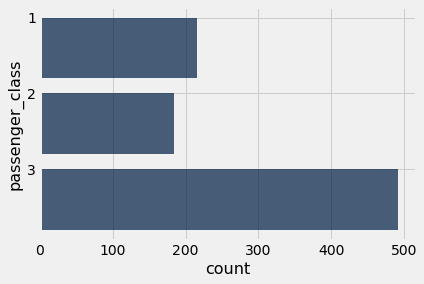

In [22]:
Passenger_class_data = titanic.group("passenger_class")
Passenger_class_data.barh("passenger_class")

In [23]:
titanic.sort("Age").show(5)

PassengerId,Survived,passenger_class,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_size
804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,nan,C,1
756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5,nan,S,2
470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,nan,C,3
645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,nan,C,3
79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29,nan,S,2


In [24]:
Oldest=titanic.sort("Age",descending=True).show(5)

PassengerId,Survived,passenger_class,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_size
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,nan,1,2,W./C. 6607,23.45,nan,S,3
879,0,3,"Laleff, Mr. Kristo",male,nan,0,0,349217,7.8958,nan,S,0
869,0,3,"van Melkebeke, Mr. Philemon",male,nan,0,0,345777,9.5,nan,S,0
864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,nan,8,2,CA. 2343,69.55,nan,S,10
860,0,3,"Razi, Mr. Raihed",male,nan,0,0,2629,7.2292,nan,C,0


In [25]:
titanic.where("Age",are.between(0,200)).sort("Age",descending=True).show(5)

PassengerId,Survived,passenger_class,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_size
631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80,0,0,27042,30,A23,S,0
852,0,3,"Svensson, Mr. Johan",male,74,0,0,347060,7.775,nan,S,0
494,0,1,"Artagaveytia, Mr. Ramon",male,71,0,0,PC 17609,49.5042,nan,C,0
97,0,1,"Goldschmidt, Mr. George B",male,71,0,0,PC 17754,34.6542,A5,C,0
117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.75,nan,Q,0


In [26]:
surv_rate=Passenger_class_data.column("count")/titanic.num_rows*100
survival = Passenger_class_data.with_column("Rate",surv_rate).drop("count")
survival

passenger_class,Rate
1,24.2424
2,20.651
3,55.1066


1)Create a bar graph to show the rate of survival based on class

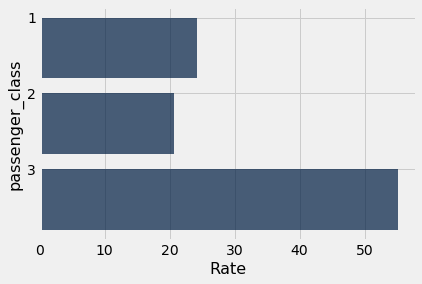

In [27]:
survival.barh("passenger_class","Rate")

2) Did more men or women survive on the titanic?

In [41]:
males = titanic.select("Sex","Survived").where("Sex",are.equal_to("male")).num_rows
males

577

In [42]:
females = titanic.select("Sex","Survived").where("Sex",are.equal_to("female")).num_rows
females

314

3)Who bought the most expensive ticket?

In [48]:
titanic.sort("Fare", descending=True).take(0)

PassengerId,Survived,passenger_class,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_size
738,1,1,"Lesurer, Mr. Gustave J",male,35,0,0,PC 17755,512.329,B101,C,0
